<a href="https://colab.research.google.com/github/sujaysavanth/statisticsfordata/blob/main/Hypothesis3_Energy_ANOVA_By_State_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🔍 Hypothesis 3: Do Energy Usage Levels Differ Significantly Across States?

In this notebook, we test whether average city-level energy consumption differs by state using a **one-way ANOVA test**.


ANOVA F-statistic: 4.0644
p-value: 0.0000
✅ There is a statistically significant difference in average energy use between states.


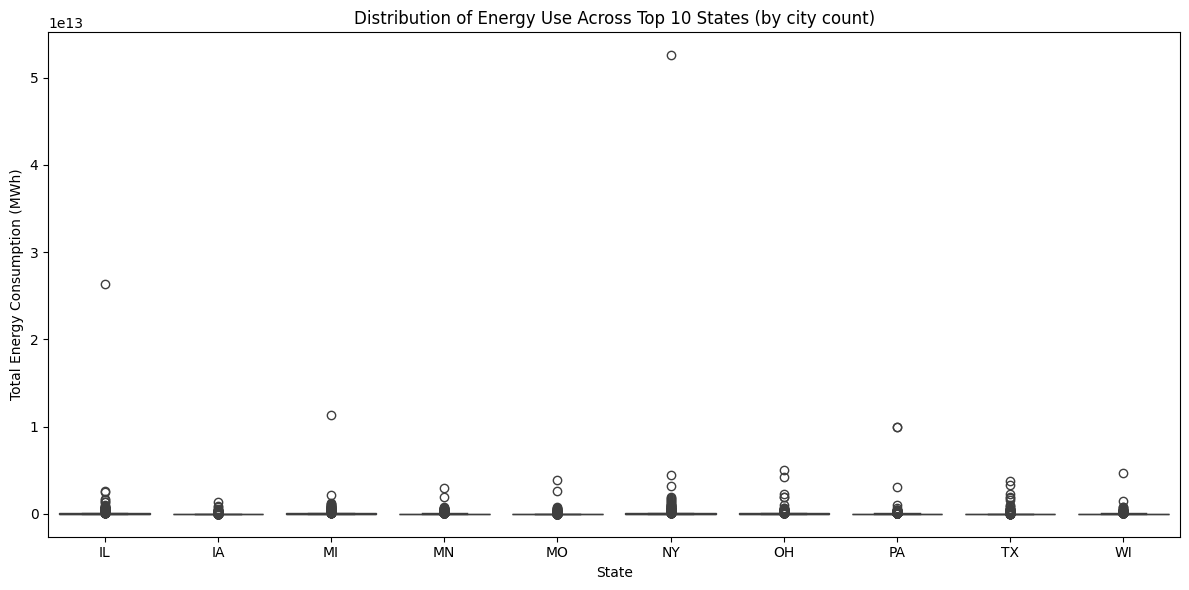

In [1]:

!pip install pyxlsb

import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/2016cityandcountyenergyprofiles (1).xlsb"
city_data = pd.read_excel(file_path, engine='pyxlsb', sheet_name='City', skiprows=1)
city_data.columns = city_data.iloc[2]
city_data = city_data.drop([0, 1, 2]).reset_index(drop=True)

# Extract relevant columns
mwh_index = list(city_data.columns).index('consumption (MWh)')
tcf_index = list(city_data.columns).index('consumption (TcF)')

city_df = pd.DataFrame()
city_df['state_abbr'] = city_data['state_abbr']
city_df['electricity_MWh'] = pd.to_numeric(city_data.iloc[:, mwh_index], errors='coerce')
city_df['natural_gas_TcF'] = pd.to_numeric(city_data.iloc[:, tcf_index], errors='coerce')
city_df['total_energy_MWh'] = city_df['electricity_MWh'] + city_df['natural_gas_TcF'] * 293071
city_df.dropna(subset=['state_abbr', 'total_energy_MWh'], inplace=True)

# Prepare data for ANOVA: group total energy usage by state
grouped_data = [group['total_energy_MWh'].values for _, group in city_df.groupby('state_abbr') if len(group) > 1]

# Run one-way ANOVA
anova_stat, anova_pval = f_oneway(*grouped_data)

print(f"ANOVA F-statistic: {anova_stat:.4f}")
print(f"p-value: {anova_pval:.4f}")

if anova_pval < 0.05:
    print("✅ There is a statistically significant difference in average energy use between states.")
else:
    print("❌ No significant difference found between states.")

# Optional: Boxplot visualization
plt.figure(figsize=(12, 6))
top_states = city_df['state_abbr'].value_counts().head(10).index
sns.boxplot(data=city_df[city_df['state_abbr'].isin(top_states)], x='state_abbr', y='total_energy_MWh')
plt.title("Distribution of Energy Use Across Top 10 States (by city count)")
plt.ylabel("Total Energy Consumption (MWh)")
plt.xlabel("State")
plt.tight_layout()
plt.show()



## ✅ Conclusion

This one-way ANOVA test evaluates whether **average city-level energy use differs between states**.

- If the **p-value < 0.05**, we conclude that **at least one state** has a significantly different mean energy usage.
- This insight is useful for state-level energy policy and benchmarking.

The accompanying boxplot visualizes the distribution across top states.
